# 06. Model selection

In [1]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

from IPython.display import display

In [2]:
data = './data/'
out = './out/'

# Bold print for Jupyter Notebook
b1 = '\033[1m'
b0 = '\033[0m'

### Just some matplotlib and seaborn parameter tuning

In [3]:
axistitlesize = 20
axisticksize = 17
axislabelsize = 26
axislegendsize = 23
axistextsize = 20
axiscbarfontsize = 15

# Set axtick dimensions
major_size = 6
major_width = 1.2
minor_size = 3
minor_width = 1
mpl.rcParams['xtick.major.size'] = major_size
mpl.rcParams['xtick.major.width'] = major_width
mpl.rcParams['xtick.minor.size'] = minor_size
mpl.rcParams['xtick.minor.width'] = minor_width
mpl.rcParams['ytick.major.size'] = major_size
mpl.rcParams['ytick.major.width'] = major_width
mpl.rcParams['ytick.minor.size'] = minor_size
mpl.rcParams['ytick.minor.width'] = minor_width

mpl.rcParams.update({'figure.autolayout': False})

# Seaborn style settings
sns.set_style({'axes.axisbelow': True,
               'axes.edgecolor': '.8',
               'axes.facecolor': 'white',
               'axes.grid': True,
               'axes.labelcolor': '.15',
               'axes.spines.bottom': True,
               'axes.spines.left': True,
               'axes.spines.right': True,
               'axes.spines.top': True,
               'figure.facecolor': 'white',
               'font.family': ['sans-serif'],
               'font.sans-serif': ['Arial',
                'DejaVu Sans',
                'Liberation Sans',
                'Bitstream Vera Sans',
                'sans-serif'],
               'grid.color': '.8',
               'grid.linestyle': '--',
               'image.cmap': 'rocket',
               'lines.solid_capstyle': 'round',
               'patch.edgecolor': 'w',
               'patch.force_edgecolor': True,
               'text.color': '.15',
               'xtick.bottom': True,
               'xtick.color': '.15',
               'xtick.direction': 'in',
               'xtick.top': True,
               'ytick.color': '.15',
               'ytick.direction': 'in',
               'ytick.left': True,
               'ytick.right': True})

# Colorpalettes, colormaps, etc.
sns.set_palette(palette='rocket')

### 1. Implement a linear model

* return the weight parameters $w = \left\{ w_{1}, w_{2}, \dots , w_{p} \right\}$ and the intercept parameter $w_{0}$ separately where:

$$
\hat{y} \left( \vec{w}, \vec{x} \right)
=
w_{0} + w_{1} x_{1} + \dots + w_{p} x_{p}
$$

* check your returned coefficients with the built in `LinearRegression` class from the `sklearn` library, they should be within tolerance `1e-6`to each other

* use a generated regression dataset `from sklearn.dataset import make_regression` API with parameters `n_samples=1000` and `n_features=20`

### Generate dataset

In [4]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [5]:
X, y = datasets.make_regression(n_samples=1000, n_features=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Linear regression baseline

In [6]:
# Fit the linear regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
# Get coefficients
w = lin_reg.coef_
w_0 = lin_reg.intercept_

### Own function to export $w$ and $w_{0}$ parameters

I've decided to write a Python class for this. In the most basic examples, regression usually based on gradient descent (at least that's what I've learned 4 years ago in my deep learning class). We

In [79]:
class linear_regression(object):
    
    def __init__(self, lr=1e-04, iters=100000):
        self.lr = lr
        self.iters = iters

    def __cost_func(self, X, y, coef_):
        return (((X @ coef_) - y)**2).sum() / (2 * len(y))

    def __gradient_descent(self, X, y):
        self.cost_history = np.zeros(self.iters)
        self.loss_history = np.zeros(self.iters)
        coef_ = self.coef_
        for i in range(self.iters):
            # Calculate hypothesis
            h = X @ coef_
            # Difference between hypothesis and groundtruth
            loss = h - y
            self.loss_history[i] = np.mean(loss)
            # Gradient calculation
            gradient = (X.T @ loss) / len(y)
            # Changing values of coef_ using gradient
            coef_ = coef_ - self.lr * gradient            
            # Calculate cost
            cost = self.__cost_func(X, y, coef_)
            self.cost_history[i] = cost
            #if i % 6000 == 0:
            #    print('Cost : {0}'.format(cost))
        return coef_

    def fit(self, X, y):
        # Number of features in the dataset
        self.dim = X.shape[1]
        # Initialize coef_ for gradient descent
        self.coef_ = np.ones(self.dim)
        # Perform gradient descent and update coef_ coeffs
        self.coef_ = self.__gradient_descent(X, y)
        self.intercept_ = np.sum(y - X @ self.coef_) / len(y)
        
    def predict(self, X):
        return X @ self.coef_ + self.intercept_

In [80]:
my_lin_reg = linear_regression(iters=300000)

In [81]:
my_lin_reg.fit(X_train, y_train)

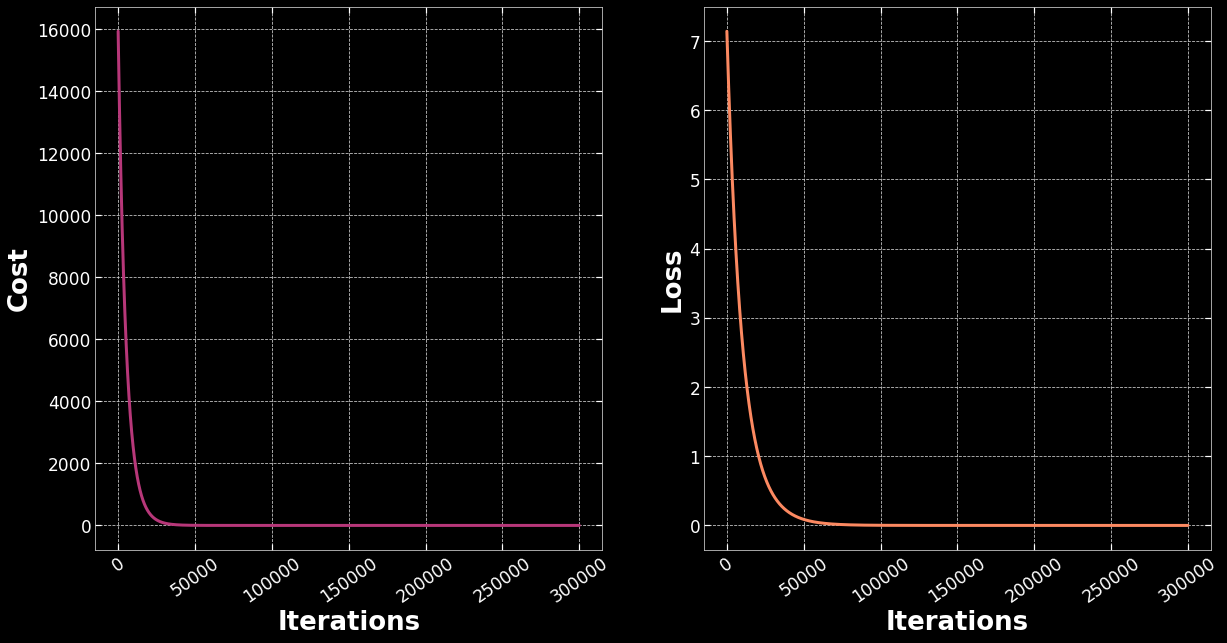

In [118]:
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*10, nrows*10),
                         facecolor='black', subplot_kw={'facecolor' : 'black'})

axes[0].plot(my_lin_reg.cost_history,
          color=cm.magma(0.5), lw=3)
axes[1].plot(my_lin_reg.loss_history,
             color=cm.magma(0.75), lw=3)

y_label = ['Cost', 'Loss']
for i in range(ncols):
    ax = axes[i]
    ax.set_xlabel('Iterations', fontsize=axislabelsize, fontweight='bold', color='white')
    ax.set_ylabel(y_label[i], fontsize=axislabelsize, fontweight='bold', color='white')
    ax.tick_params(axis='both', which='major', labelsize=axisticksize, colors='white')
    ax.tick_params(axis='x', which='major', rotation=35)

plt.show()

In [83]:
y_pred = my_lin_reg.predict(X_test)

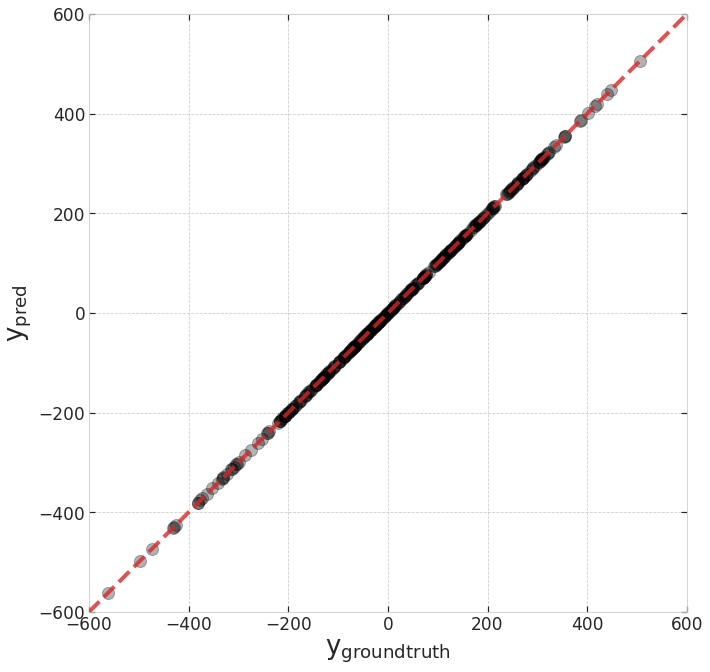

In [110]:
fig, axes = plt.subplots(figsize=(11,11))
axes.set_aspect('equal')

x_lim = 600
y_lim = 600
axes.plot([-x_lim, x_lim], [-y_lim, y_lim],
          color='tab:red', lw=4, ls='--', zorder=3, alpha=0.8)

sc = 12
axes.scatter(y_test, y_pred,
             color='black', s=sc**2, alpha=0.3)

axes.set_xlim(-x_lim, x_lim)
axes.set_ylim(-y_lim, y_lim)

axes.set_xlabel('$\mathrm{y_{groundtruth}}$', fontsize=axislabelsize, fontweight='bold')
axes.set_ylabel('$\mathrm{y_{pred}}$', fontsize=axislabelsize, fontweight='bold')
axes.tick_params(axis='both', which='major', labelsize=axisticksize)

plt.show()

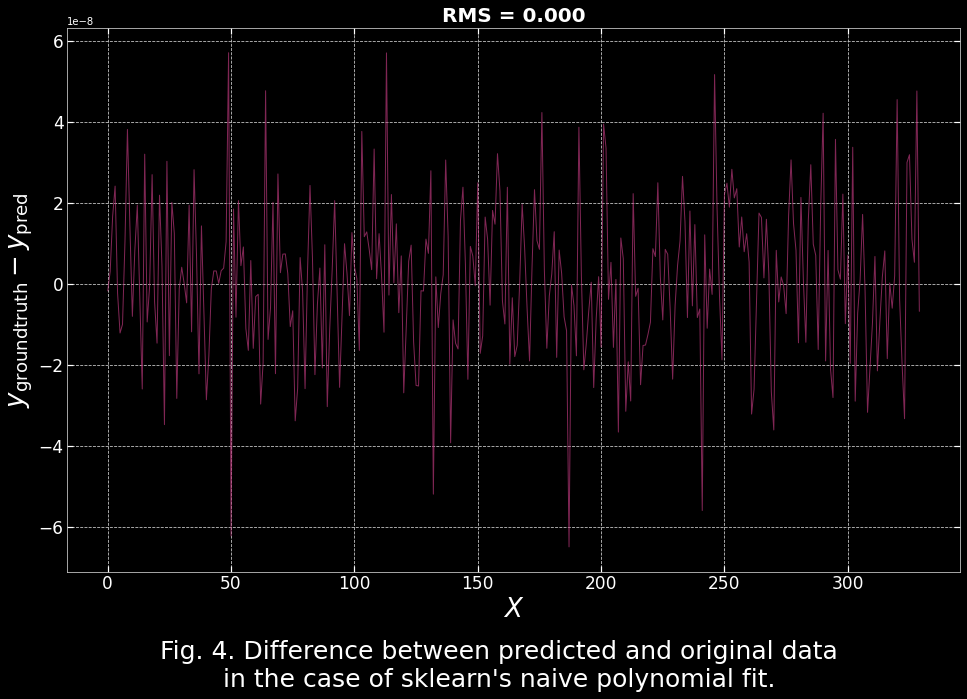

In [111]:
fig, axes = plt.subplots(figsize=(16, 10),
                         facecolor='black', subplot_kw={'facecolor' : 'black'})

diff = y_test - y_pred
axes.plot(diff, label='Residuals',
          color=cm.magma(0.5), lw=1, alpha=0.7)

axes.set_title('RMS = {0:.3f}'.format(np.sqrt(np.mean(diff**2))), fontsize=axistitlesize, fontweight='bold', color='white')
axes.set_xlabel('$X$', fontsize=axislabelsize, fontweight='bold', color='white')
axes.set_ylabel('$y_{\mathrm{groundtruth}} - y_{\mathrm{pred}}$', fontsize=axislabelsize, fontweight='bold', color='white')
axes.tick_params(axis='both', which='major', labelsize=axisticksize, colors='white')

fig.suptitle('Fig. 4. Difference between predicted and original data\nin the case of sklearn\'s naive linear regression.',
             color='white', fontsize=axistitlesize+5, y=0.03)

plt.show()

## 2. Use of real data

* download the [Communities and Crime Data Set](https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime) from UCI, the task includes understanding the dataset: naming the appropiate data fields, handling missing values, etc.
    
* fit a `LinearRegression` model with 5-fold cross-validation - compare training and testing scores (R^2 by default) for the different CV splits, print the mean score and its standard deviation

* find the best `Lasso` regression model with 5-fold grid search cross validation (`GridSearchCV`) on the parameters: `alpha, normalize, max_iter` and show the best parameter set

### 2./a. Load dataset

In [46]:
os.listdir(data)

['communities.data', 'communities.names']

In [55]:
features = []
# Feature names start with `@attribute`, followed by the feature name,
# then ending with the type of the feature values (numeric/string/etc.)
with open(data + 'communities.names') as f:
    while True:
        line = f.readline()
        if not line:
            break
        if '@attribute' in line.strip():
            features.append(line.strip().split(' ')[1])

In [76]:
# Missing values are marked with an `?` in the dataset
df = pd.read_csv(data + 'communities.data', sep=',', names=features, na_values=['?'])

In [77]:
display(df.head())
display(df.tail())

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
1989,12,NaN,NaN,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,6,NaN,NaN,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,9,9.0,80070.0,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
1992,25,17.0,72600.0,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18,0.19
1993,6,NaN,NaN,Ontariocity,10,0.20,0.78,0.14,0.46,0.24,...,0.11,0.30,0.05,0.08,0.04,0.73,0.5,1.00,0.13,0.48


### 2./b. Handle missing/ID labels

While missing values in meaningful features should be filled appropriately, columns representing ID-like variables can be deleted. Location and violent crime rates do correlates in real life, but an idea of a causal relationship between location and crime rates can be discarded now. Description for each feature can be accessed in the `community.names` file.

#### ID-like columns
The first 4 columns (`state`, `county`, `community`, `communityname`) can be delete, because they represent locational data.

In [78]:
df = df[features[4:]]

The column `fold` is a debug feature from cross-validation, which can be also discarded for now.

In [79]:
df = df[features[5:]]

#### Features with missing values

According to the feature descriptions, all remaining columns are in a decimal format and scaled into the inteval of $\left[ 0, 1 \right]$. The only exception is the feature `LemasGangUnitDeploy`, which is actually an ordinal with values $0.0$, $0.5$ and $1.0$. We can still however handle it as a decimal feature.

There is a table in the `community.names` description file, which summarize the basic statistical attributes (mean, median, standard deviation, etc.) of each features in the dataset. According to this table any features with missing entries have exactly $1675$ missing values in each of them. (There is only one exception, the column `OtherPerCap`, where only $1$ values is missing.). It is entirely logical to assume that in this case the missing features are always missing from the same lines. If the hypothesis is true, we can test it by visualizing the missing values on a matrixplot. If we plot features on the $y$-axis, we should see only horizontal lines (which are interrupted by vertical gaps) in the dataset, instead of individual points scattered all around the dataset.

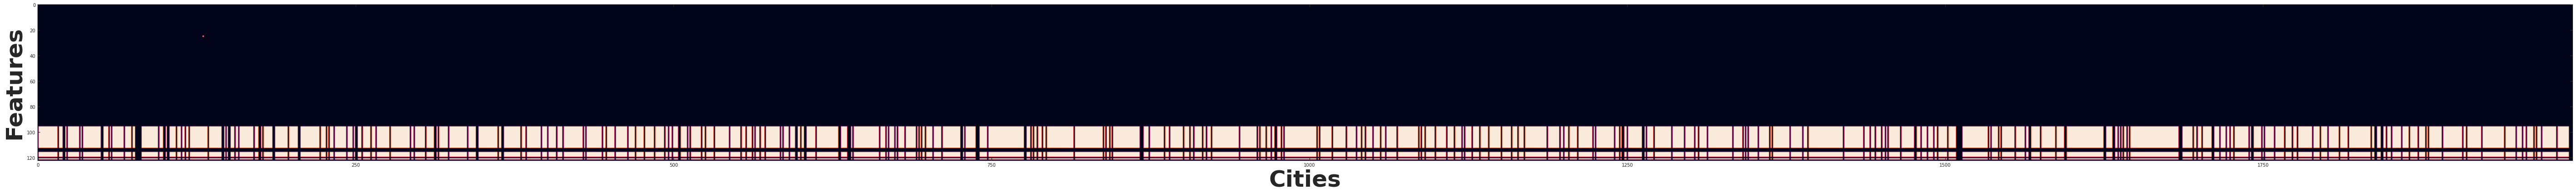

In [85]:
figsize = 100
fig, axes = plt.subplots(figsize=(figsize,figsize))
axes.set_aspect('equal')
axes.grid(False)

axes.imshow(df.isna().T)
axes.set_xlabel('Cities', fontsize=50, fontweight='bold')
axes.set_ylabel('Features', fontsize=50, fontweight='bold')

plt.show()

These are indeed "horizontal lines interrupted by vertical gaps".

## 3. Shrinkage

* interpret Lasso model's findings based on its descriptive parameters by the shrinkage method described during the lecture (make a plot and check the names of the features that are not eliminated by the penalty parameter) on the data we have here (this is an explanatory data analysis problem, be to be creative)

* fit Ridge model and apply the shrinkage method as well, did you get what you expect?

* do you think normalization is needed here? If so, do not forget!

## 4. Subset selection

* Split the data to a training and test set and do recursive feature elimination until 10 remaining predictors with 5-fold cross-validated regressors (`RidgeCV`, `LassoCV`, `ElasticNetCV`) on the training set, plot their names and look up some of their meanings (recursive feature elimination is part of `sklearn` but you can do it with a for loop if you whish).

* Do all models provide the same descriptors? Check their performance on the test set! Plot all model predictions compared to the `y_test` on 3 different plots, which model seems to be the best?

## 5. ElasticNet penalty surface

* visualize the surface of the $ objective(\alpha, \beta) $ parameters corresponding to the L1 and L2 regularizations. Select the best possible combination of the hyper-parameters that minimize the objective (clue: `from scipy.optimize import minimize`)
    * this task is similar to what you've seen during class, just not for MSE vs. single penalty parameter but MSE vs. two penalty parameters $\alpha, \beta$

* interpret the findings! do you think linear models are powerful enough on this dataset?

### Hints:
 - On total you can get 10 points for fully completing all tasks.
 - Decorate your notebook with, questions, explanation etc, make it self contained and understandable!
 - Comments you code when necessary
 - Write functions for repetitive tasks!
 - Use the pandas package for data loading and handling
 - Use matplotlib and seaborn for plotting or bokeh and plotly for interactive investigation
 - Use the scikit learn package for almost everything
 - Use for loops only if it is really necessary!
 - Code sharing is not allowed between student! Sharing code will result in zero points.
 - If you use code found on web, it is OK, but, make its source clear! 